In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [166]:
#df = pd.read_csv('/home/aapostolakis/Documents/ffpcode/ml-fires-1/ML_fires_al/results/hyperopt/hyperopt_results_tensorflow_NN_700_50_scores_aucval_1.csv')
df = pd.read_csv('/home/aapostolakis/Documents/ffpcode/ml-fires-1/ML_fires_al/results/hyperopt/hyperopt_results_tensorflow_NN_200_scores_aucval_1.csv')
#df = pd.read_csv('/home/aapostolakis/Documents/ffpcode/ml-fires-1/ML_fires_al/results/hyperopt/hyperopt_results_tensorflow_NN_1750_200_scores_aucval_1.csv')
#df = pd.read_csv('/home/aapostolakis/Documents/ffpcode/ml-fires-1/ML_fires_al/results/hyperopt/hyperopt_results_sklearn_RF_scores_aucval_1.csv')

In [167]:
totalrows=len(df.index)
totalrows


23813

In [168]:
def firegroupby(classnum, classname, col, cutscheme):
    dffire = df[df['fire']==classnum]
    classtotal = len(dffire.index)
    print(len(dffire.index))
    tgroups = dffire.groupby(pd.cut(dffire[col], cutscheme)).count()
    print(tgroups['id'].sum())
    tgroups.rename(columns={'id': classname}, inplace=True)
    tgroups = tgroups[[classname]]
    tgroups[classname+' rate'] = tgroups[classname]/classtotal
    tgroups[classname+' sum'] = tgroups[classname].cumsum()
    dffire=None
    return tgroups
    

In [175]:
cutscheme = np.arange(0, 1.01, 0.01)

In [176]:
groupsfire = firegroupby(1, 'actual fire (TPR)', '1', cutscheme)
groupsnof = firegroupby(0, 'no fire (TNR)', '1', cutscheme)

11236
11236
12577
12577


In [177]:
thressgroups = pd.concat([groupsfire,groupsnof], axis=1)

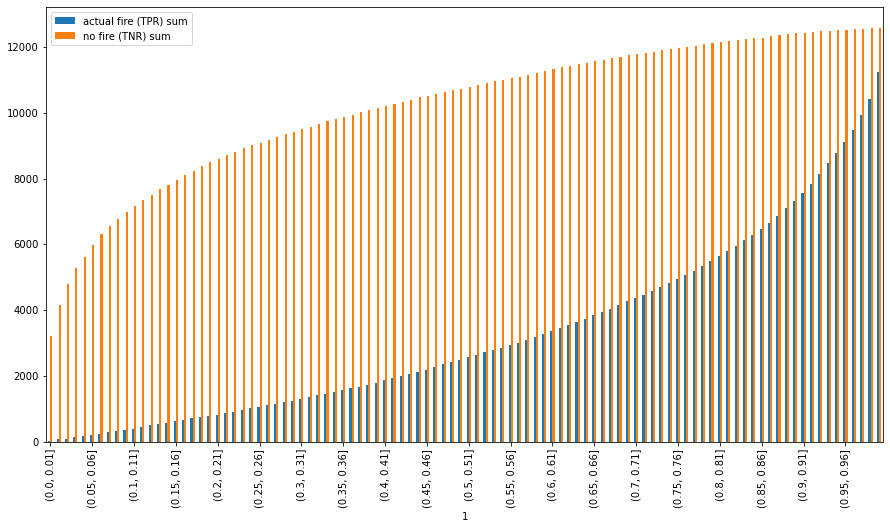

In [178]:
ax2 = thressgroups[['actual fire (TPR) sum', 'no fire (TNR) sum']].plot.bar(figsize=(15,8))
ax2.xaxis.set_major_locator(ticker.MultipleLocator(5))

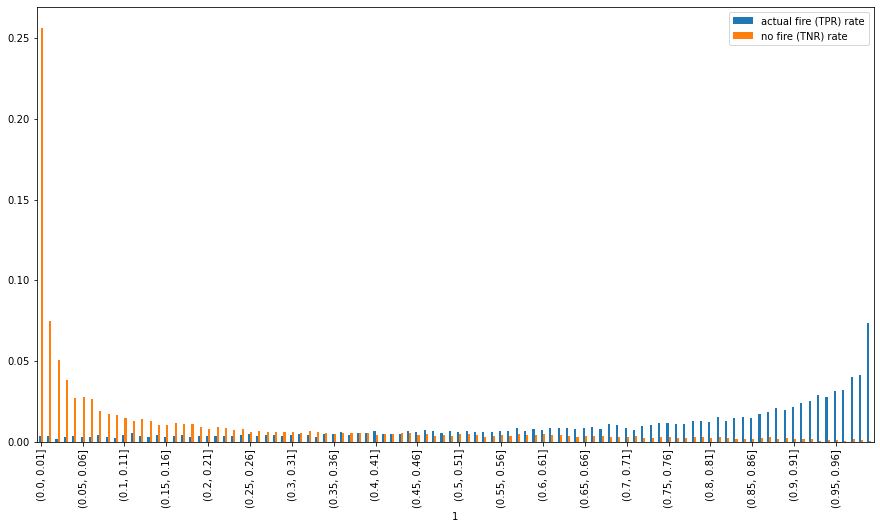

In [179]:
ax2 = thressgroups[['actual fire (TPR) rate', 'no fire (TNR) rate']].plot.bar(figsize=(15,8))
ax2.xaxis.set_major_locator(ticker.MultipleLocator(5))

In [180]:
thressgroups

,actual fire (TPR),actual fire (TPR) rate,actual fire (TPR) sum,no fire (TNR),no fire (TNR) rate,no fire (TNR) sum
1,,,,,,
"(0.0, 0.01]",40,0.003560,40,3222,0.256182,3222
"(0.01, 0.02]",43,0.003827,83,942,0.074899,4164
"(0.02, 0.03]",24,0.002136,107,640,0.050887,4804
"(0.03, 0.04]",32,0.002848,139,483,0.038403,5287
"(0.04, 0.05]",39,0.003471,178,346,0.027511,5633
...,...,...,...,...,...,...
"(0.95, 0.96]",354,0.031506,9125,19,0.001511,12521
"(0.96, 0.97]",365,0.032485,9490,12,0.000954,12533
"(0.97, 0.98]",451,0.040139,9941,23,0.001829,12556
